# Siamese similarity model

Using the Fashion MNIST dataset
Train model to infer if two items are similar or different
- training set has 6000 of each of 10 categories


Siamese structure. See article by Chopra, Hadsell and LeCun: "Learning a Similarity Metric Discriminatively, with application to Face Verification".

In [1]:
# Fix issue that autocomplete is unresponsive
%config Completer.use_jedi = False

In [2]:
import tensorflow as tf

Get classes for functional API

In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Lambda
from tensorflow.keras.optimizers import RMSprop

Get Keras backend functions

In [4]:
from tensorflow.keras import backend as K

Get dataset

In [5]:
from tensorflow.keras.datasets import fashion_mnist
# load the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# prepare train and test sets
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# normalize values
train_images = train_images / 255.0
test_images = test_images / 255.0

Other support libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFont, ImageDraw

## Pre-process data into pairs

In [7]:
import support as s

In [8]:
# create pairs on train and test sets
tr_pairs, tr_y = s.create_pairs_on_set(train_images, train_labels)
ts_pairs, ts_y = s.create_pairs_on_set(test_images, test_labels)

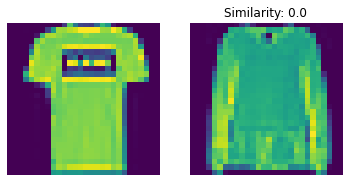

In [28]:
# Let's see pair 1
idx = 1

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(tr_pairs[idx][0])
ax1.axis('Off')
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(tr_pairs[idx][1])
ax2.axis('Off')
ax2.set_title("Similarity: " + str(tr_y[idx]))
plt.show()